In [38]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [39]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [40]:
# load the dataset
dataframe = pandas.read_csv('EEG.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [41]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [42]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

335 165


In [43]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [44]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [45]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [46]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=40, batch_size=1, verbose=2)

Epoch 1/40
3s - loss: 0.1011
Epoch 2/40
2s - loss: 0.0207
Epoch 3/40
2s - loss: 0.0165
Epoch 4/40
2s - loss: 0.0124
Epoch 5/40
2s - loss: 0.0092
Epoch 6/40
2s - loss: 0.0071
Epoch 7/40
2s - loss: 0.0060
Epoch 8/40
2s - loss: 0.0055
Epoch 9/40
2s - loss: 0.0054
Epoch 10/40
2s - loss: 0.0052
Epoch 11/40
2s - loss: 0.0053
Epoch 12/40
2s - loss: 0.0053
Epoch 13/40
2s - loss: 0.0053
Epoch 14/40
2s - loss: 0.0054
Epoch 15/40
3s - loss: 0.0053
Epoch 16/40
2s - loss: 0.0053
Epoch 17/40
2s - loss: 0.0053
Epoch 18/40
2s - loss: 0.0053
Epoch 19/40
2s - loss: 0.0053
Epoch 20/40
2s - loss: 0.0053
Epoch 21/40
2s - loss: 0.0052
Epoch 22/40
2s - loss: 0.0053
Epoch 23/40
2s - loss: 0.0053
Epoch 24/40
2s - loss: 0.0053
Epoch 25/40
2s - loss: 0.0053
Epoch 26/40
2s - loss: 0.0053
Epoch 27/40
2s - loss: 0.0054
Epoch 28/40
2s - loss: 0.0052
Epoch 29/40
2s - loss: 0.0054
Epoch 30/40
2s - loss: 0.0052
Epoch 31/40
2s - loss: 0.0053
Epoch 32/40
2s - loss: 0.0054
Epoch 33/40
2s - loss: 0.0053
Epoch 34/40
2s - lo

In [47]:
# Make Prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Ramy1  = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1]))
Ramy2  = numpy.reshape(testX, (testX.shape[0], testX.shape[1]))

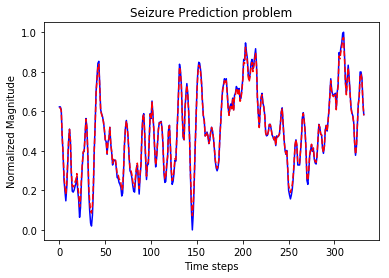

In [48]:
# Plot the predicted "train data" along with the original "train data" - Normalized Data
plt.plot(Ramy1, 'b-', label='Original train data')
plt.plot(trainPredict, 'r--', label='Predicted train data')
plt.title('Seizure Prediction problem')
plt.ylabel('Normalized Magnitude')
plt.xlabel('Time steps')
plt.show()

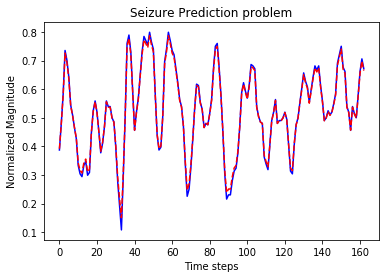

In [49]:
# Plot the predicted "test data" along with the original "test data" - Normalized Data
plt.plot(Ramy2, 'b-', label='Original test data')
plt.plot(testPredict, 'r--', label='Predicted test data')
plt.title('Seizure Prediction problem')
plt.ylabel('Normalized Magnitude')
plt.xlabel('Time steps')
plt.show()

In [50]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [51]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 14.64 RMSE
Test Score: 14.67 RMSE


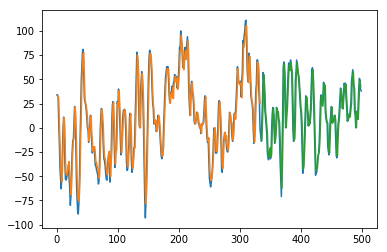

In [52]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()